In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('data/covid_19_clean_complete.csv', parse_dates=['Date'])

In [3]:
df.head()

Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [4]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


##### getting the date range

In [6]:

print(f"Earliest Entry : {df['Date'].min()}")
print(f"Last Entry : {df['Date'].max()}")
print(f"Total Days : {df['Date'].max() - df['Date'].min()}")

Earliest Entry : 2020-01-22 00:00:00
Last Entry : 2020-07-27 00:00:00
Total Days : 187 days 00:00:00


In [7]:
#renaming the column
df.rename(columns = {
    'Province/State' : 'state', 'Country/Region': 'country', 'Lat':'lat', 'Long': 'long', 'Date':'date', 'Confirmed':'confirmed',
       'Deaths':'death', 'Recovered':'recovered', 'Active':'active', 'WHO Region': 'continent'
}, inplace = True)

In [8]:
df['continent'].nunique()

6

### 1. confirmed cases all over the globe

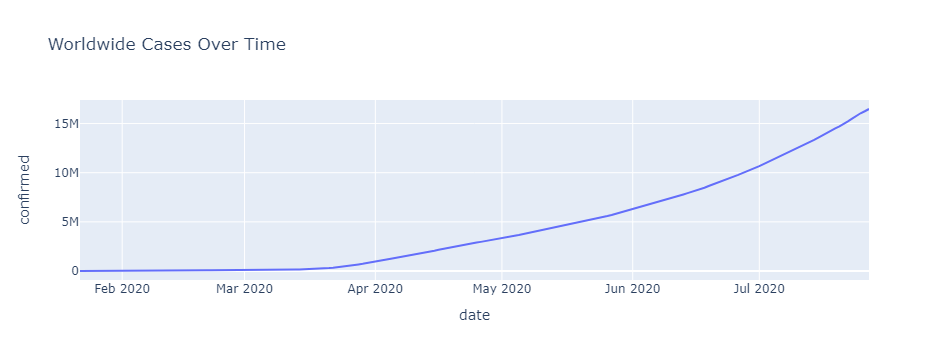

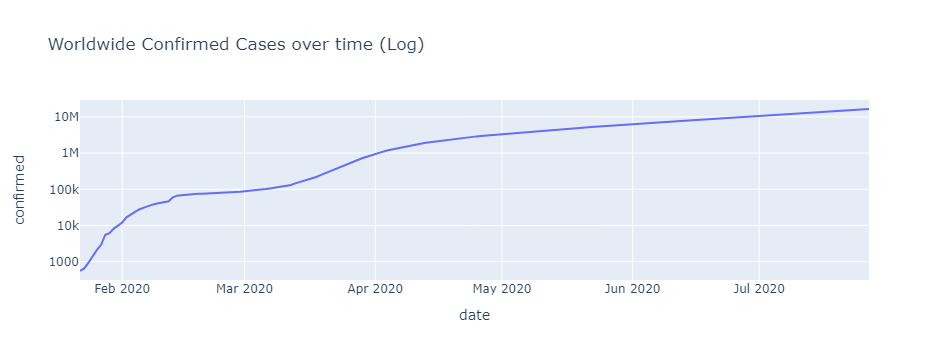

In [9]:
grouped = df.groupby('date')[['confirmed', 'death']].sum().reset_index()

fig = px.line(
    grouped, x='date', y='confirmed', title="Worldwide Cases Over Time"
)
fig.show()

fig = px.line(grouped, x='date', y='confirmed', title='Worldwide Confirmed Cases over time (Log)', log_y=True)
fig.show()

The exponential growth oof the pandemic seem to be in its peak

In [10]:
#checking for top 5 confirmed cases by countries
gp_country = df.groupby('country')[['confirmed']].sum()
gp_country.sort_values(by='confirmed', ascending=False).head(10)


confirmed
country                  
US              224345948
Brazil           89524967
Russia           45408411
India            40883464
Spain            27404045
United Kingdom   26748587
Italy            26745145
France           21210926
Germany          21059152
Iran             19339267

#### Top affected countries are US, Brazil, Russia, India, Spain

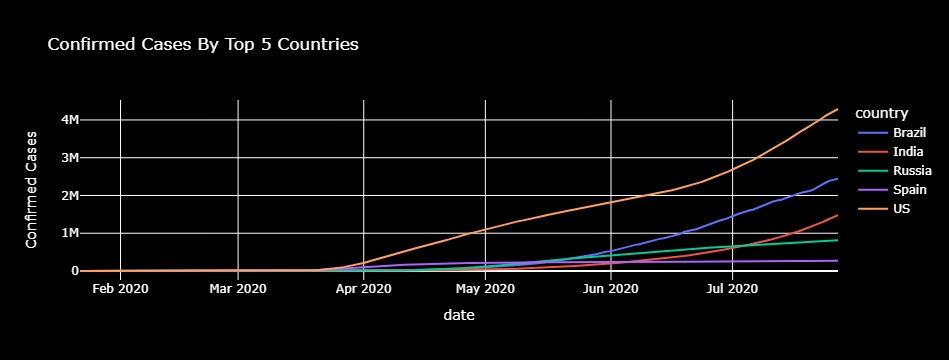

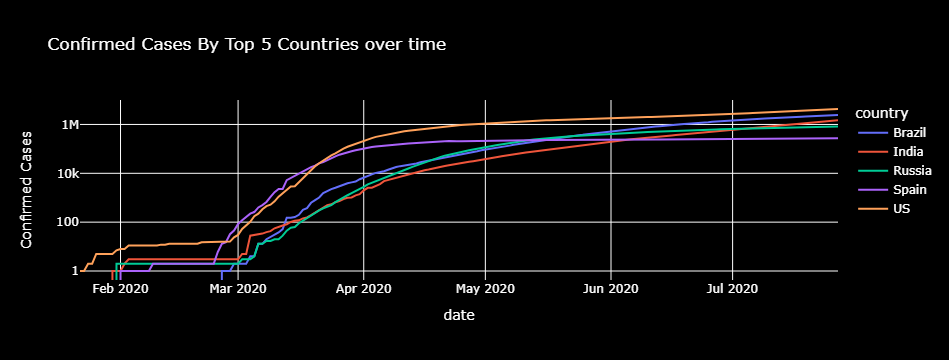

In [11]:
import plotly.express as px

most_affected = ['US', 'Brazil', 'Russia', 'India', 'Spain']
df_affect = df[df['country'].isin(most_affected)]
df_affect = df_affect.groupby(['date', 'country'])[['confirmed', 'death']].sum().reset_index()

fig = px.line(
    df_affect, x='date', y='confirmed', color='country',
    title='Confirmed Cases By Top 5 Countries',
    labels={'confirmed': 'Confirmed Cases'},
)
fig.update_layout(
    plot_bgcolor='black',  # Set the background color to black
    paper_bgcolor='black',  # Set the background color of the plot area to black
    font=dict(color='white'),  # Set text color to white
)
fig.show()

fig = px.line(
    df_affect, x='date', y='confirmed', color='country',
    title='Confirmed Cases By Top 5 Countries over time', log_y=True,
    labels={'confirmed': 'Confirmed Cases'},
)
fig.update_layout(
    plot_bgcolor='black',  # Set the background color to black
    paper_bgcolor='black',  # Set the background color of the plot area to black
    font=dict(color='white'),  # Set text color to white
)
fig.show()


Generally May is a good month as the for the top 5 countries

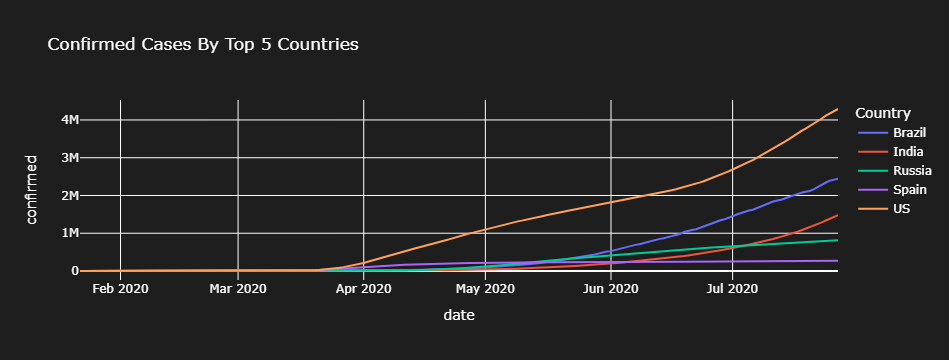

In [14]:
import plotly.express as px

most_affected = ['US', 'Brazil', 'Russia', 'India', 'Spain']
df_affect = df[df['country'].isin(most_affected)]
df_affect = df_affect.groupby(['date', 'country'])[['confirmed', 'death']].sum().reset_index()

# Create a cool-looking plot
fig = px.line(df_affect, x='date', y='confirmed', color='country', title='Confirmed Cases By Top 5 Countries')

# Customize the plot layout
fig.update_layout(
    paper_bgcolor='rgb(30,30,30)',  # Dark background
    plot_bgcolor='rgb(30,30,30)',  # Dark background for the plot area
    font=dict(color='white'),  # White text
    legend=dict(title='Country'),  # Add a legend title
)

# Customize line colors
fig.update_traces(
    line=dict(width=2),  # Line width
    marker=dict(size=7),  # Marker size
)

# Show the plot

In [15]:
# check the spreading in the most populous countries of the world
gp_country.filter(items = ['India','China','US','Indonesia', 'Nigeria'], axis=0)

confirmed
country             
India       40883464
China       14132002
US         224345948
Indonesia    4057909
Nigeria      1634040

#### How is covid spreading in the most populous countries in the world?

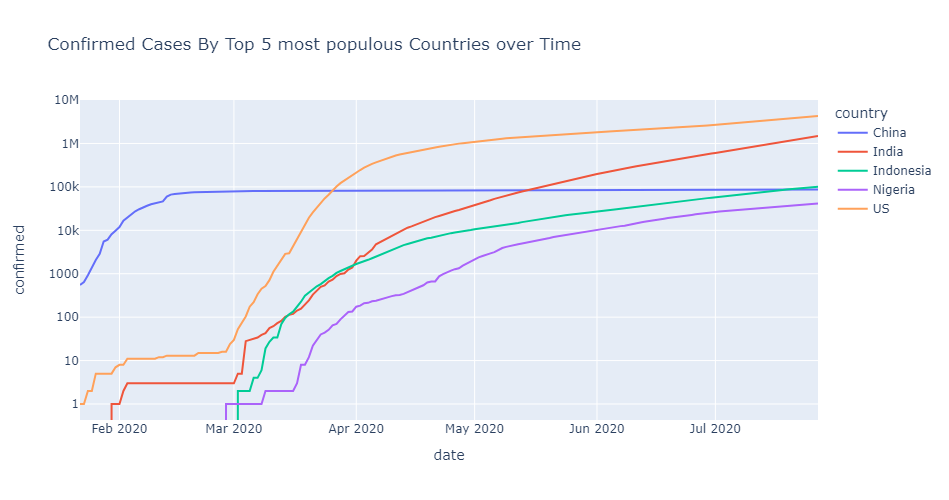

In [18]:


countries = ['India','China','US','Indonesia', 'Nigeria']
df_aff = df[df['country'].isin(countries)]
df_aff = df_aff.groupby(['date', 'country'])[[ 'confirmed', 'death']].sum().reset_index()

fig = px.line(
            df_aff, x='date', y='confirmed', 
            color='country',title= 'Confirmed Cases By Top 5 most populous Countries over Time' ,
            height=500, log_y = True            )

fig.show()

The rate of  spread  in july has dropped as compared to March/April but there still a slight upward trend

China seems to have the spread under control.

The situation in the US seem to be the most worrisome

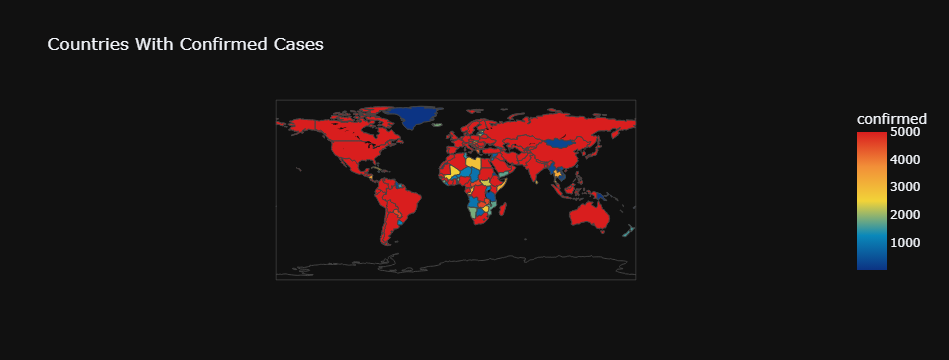

In [16]:

temp = df[[col for col in df.columns if col != 'state']]

latest = temp[temp['date'] == max(temp['date'])].reset_index()
latest_group = latest.groupby('country')[['confirmed', 'death']].sum().reset_index()


fig = px.choropleth(
                    latest_group, locations='country', locationmode='country names', color='confirmed',
                    hover_name ='country', range_color=[1, 5000], color_continuous_scale='portland',
                    title='Countries With Confirmed Cases'
                    )
fig.show()

obviously the whole world is f@*k, the case is confirmed everywhere. Atleast if we  cant stop the spread, maybe we mitigate the effect by controlling the death rate. Lets probe the data on Mortality of the virus

## ************   Taking a closer look at the Death Rate *****************

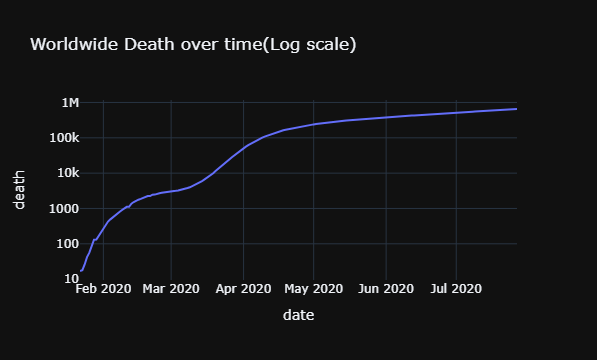

In [17]:
# plot a line graph that shows the world death over time

vampire = df.groupby('date')[['date', 'death']].sum().reset_index()

fig= px.line(vampire, x='date', y='death', 
             title='Worldwide Death over time(Log scale)', log_y= True)
fig.show()

Rate of death toll over time dropped consistently since july

#### which  countries is the Virus more potent?

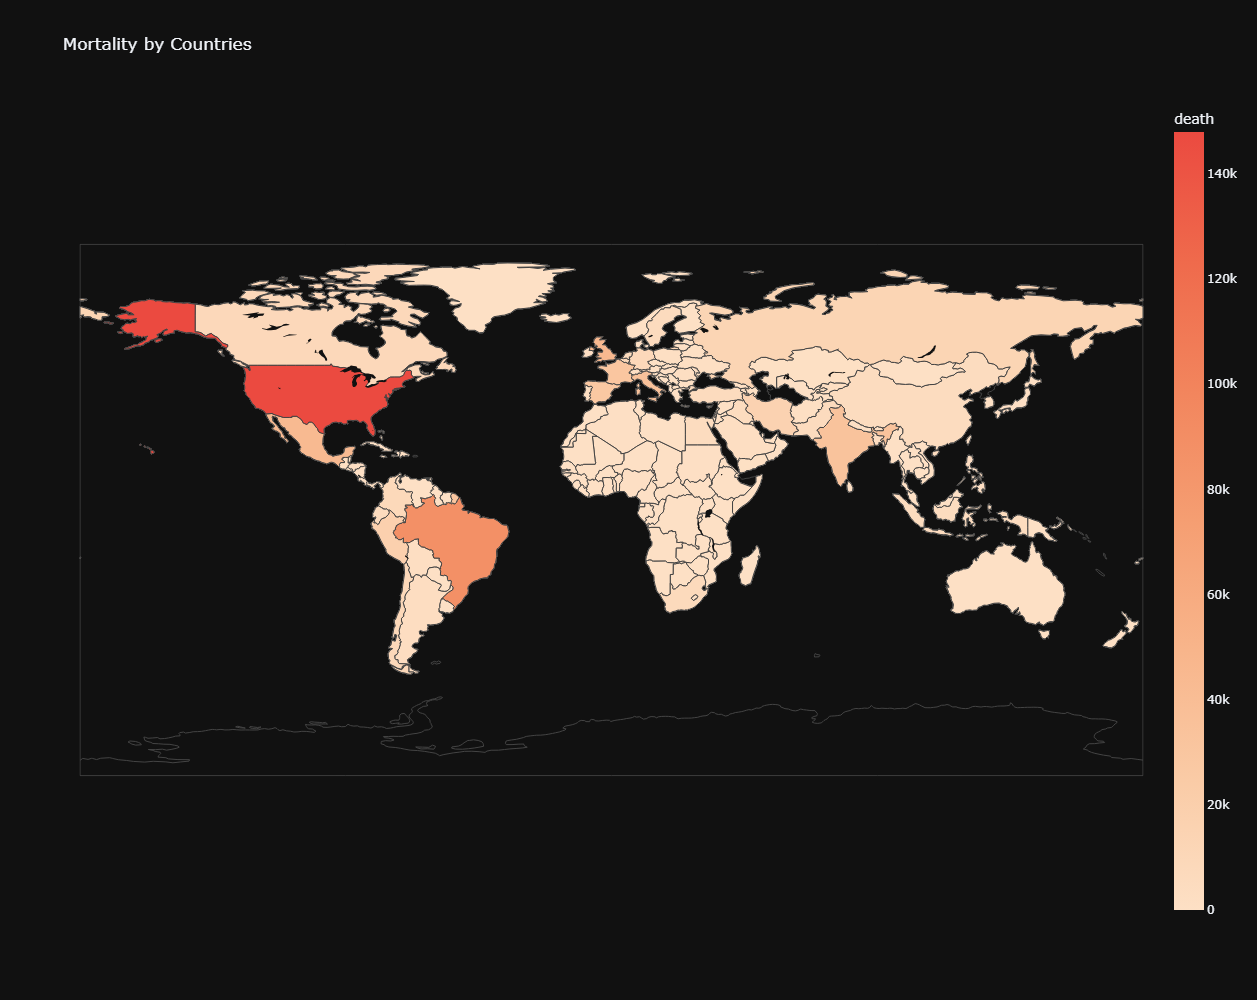

In [18]:
#1.  trend of death... groupby date and plot
df.head()

df_death = df.groupby(['date', 'country'])[['date', 'country', 'death', 'recovered']].sum().reset_index()
df_death.sort_values(by="death", ascending=False)

fig = px.choropleth(
                   df_death,locations='country', locationmode='country names', 
                   color='death', hover_name='country', color_continuous_scale='peach',
                   title = 'Mortality by Countries', height=500
                  )
fig.show()

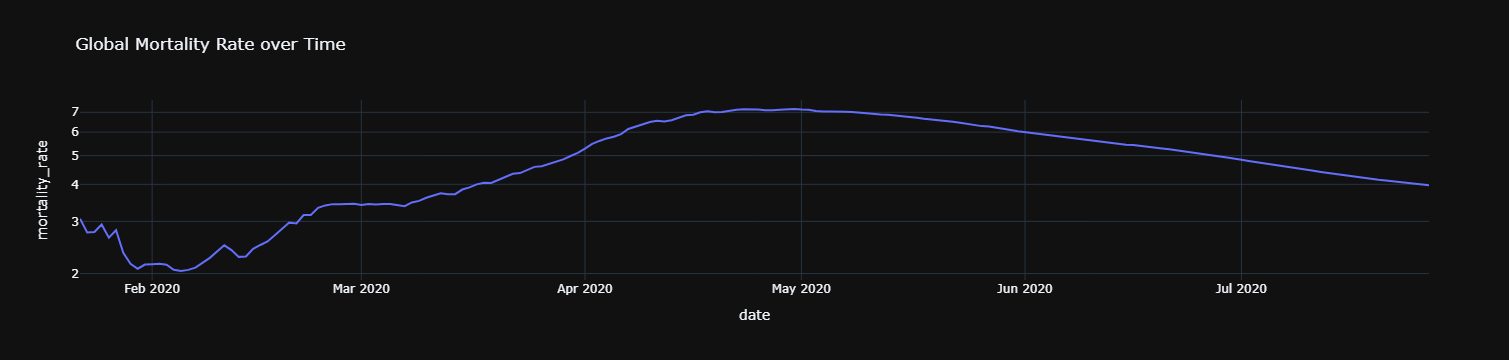

In [19]:
#mortality rate over time
df_mort = df.groupby('date')[['date','death','confirmed']].sum().reset_index()
df_mort['mortality_rate'] = (df_mort['death']/df_mort['confirmed'])*100
fig = px.line(df_mort, x='date', y='mortality_rate', title = 'Global Mortality Rate over Time', log_y=True)
fig.show()

This is a good news is the mortality rate has been on a steady fall since May ending. Anything we are doing to mitigate the virus is working

In [20]:
# top 10 country by mortality rate,
df_prob = df.groupby('country')[['country','confirmed','death']].sum().reset_index()
df_prob['mortality_rate'] = round((df_prob['death']/df_prob['confirmed'])*100, 2)
df_prob.sort_values(by='mortality_rate', ascending=False).head()

country  confirmed    death  mortality_rate
184           Yemen      67180    17707           26.36
16          Belgium    6281116   963679           15.34
177  United Kingdom   26748587  3997775           14.95
61           France   21210926  3048524           14.37
85            Italy   26745145  3707717           13.86

Yemen despite the comparatively low reported cases, the mortality rate is higher. more effort and measures should be put in place to avoid the spread.

My heart goes to the Eu area. The confirmed cases is high and so is the Mortality rate. The European are arguably more vulnerable to this virus 

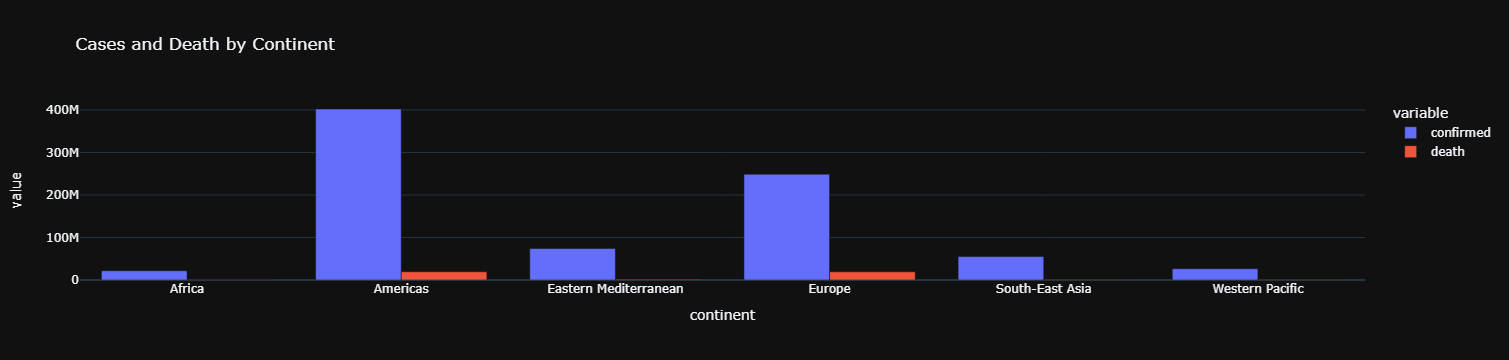

In [21]:
death_cont = df.groupby('continent')[['continent', 'confirmed', 'death']].sum().reset_index()

fig = px.bar(
            death_cont,y=['confirmed', 'death'], x = 'continent', 
             title='Cases and Death by Continent', barmode='group' )
fig.show()

Of course every life counts but The death and count of cases in other region seems to be negligible to that in America and Euro area.
Lets take a closer look at US and Europe data. 

Also The question is  this significant difference as a result of the number of test carried out. 
It will eb helpful if we can lay our hand on data for test carried out.

In [22]:
#filterfor euro area, and Us

def top_five_mortality(data,continent:str, num:int):
    '''takes in dataframe & continent name and give top 7 mortality_rate'''
    df_cont = data[data['continent'] == continent]
    df_cont = df_cont.groupby('country')[['confirmed', 'death', 'active']].sum().reset_index()
    df_cont['mortality_rate'] = round((df_cont['death']/df_cont['confirmed'])*100, 2)
    df_cont = df_cont.sort_values(by='mortality_rate', ascending=False).head(num)[::-1]
    return df_cont


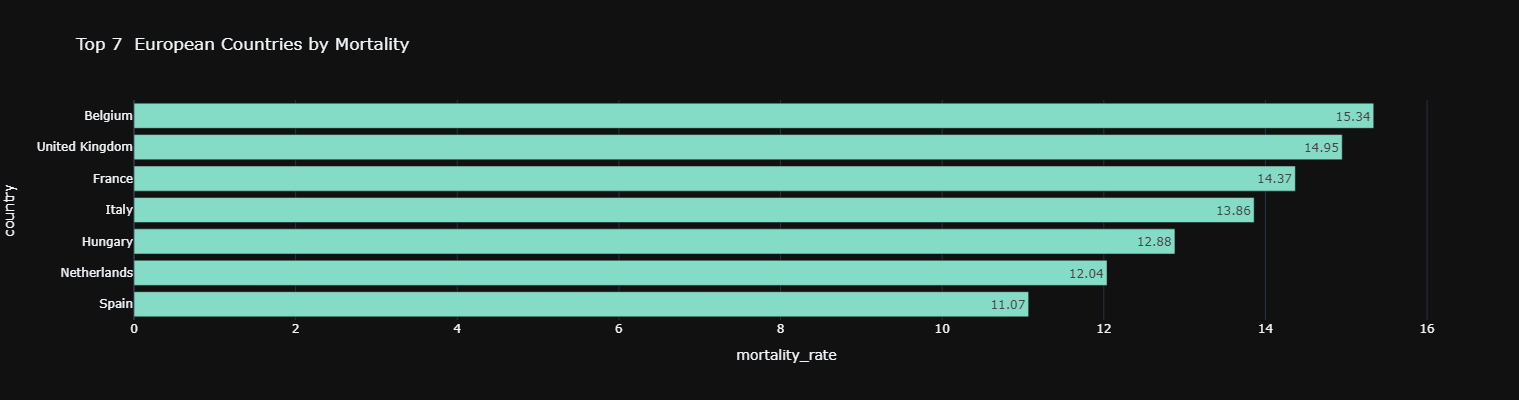

In [28]:
df_eur = top_five_mortality(df, 'Europe', 7)

fig = px.bar(df_eur, x='mortality_rate', y='country',text='mortality_rate',
             color_discrete_sequence=['#84DCC6'], 
            orientation='h', title='Top 7  European Countries by Mortality', height = 400)
fig.show()

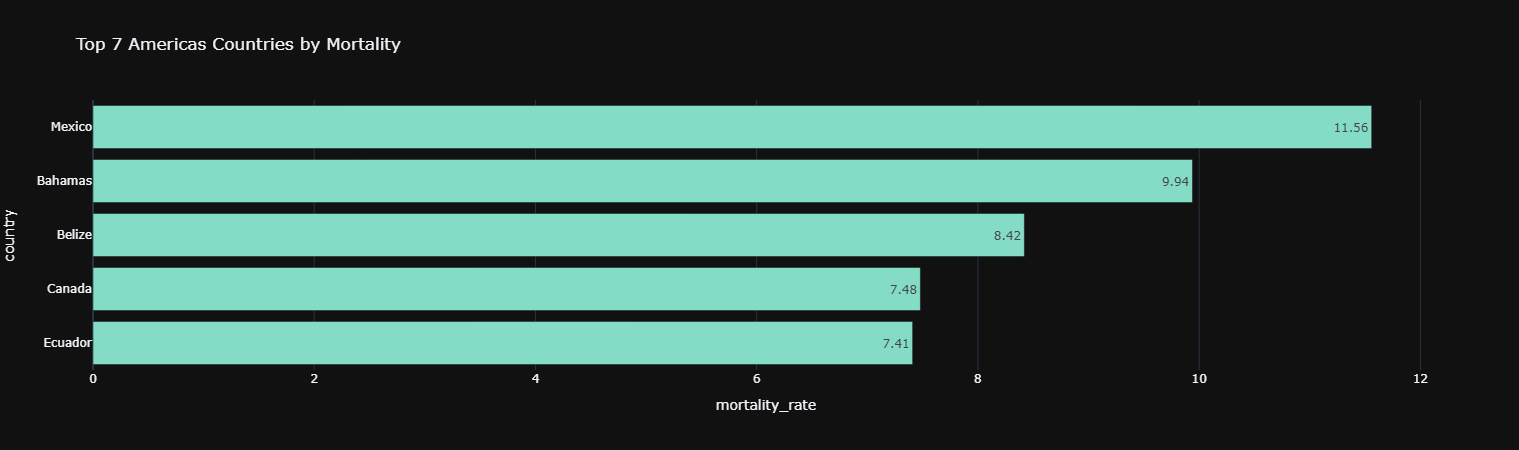

In [29]:
df_US = top_five_mortality(df, 'Americas', 5)

fig = px.bar(df_US, x='mortality_rate', y='country',text='mortality_rate',
             color_discrete_sequence=['#84DCC6'], 
            orientation='h', title='Top 7 Americas Countries by Mortality', height = 450)
fig.show()

### Active cases

In [34]:
def top_active(data,filterr, num:int):
    '''takes in dataframe & continent name and give top 7 active case'''  
    df_cont = data.groupby(filterr)[['active']].sum().reset_index()     
    df_cont = df_cont.sort_values(by='active', ascending=False)[:num][::-1]
    return df_cont
    


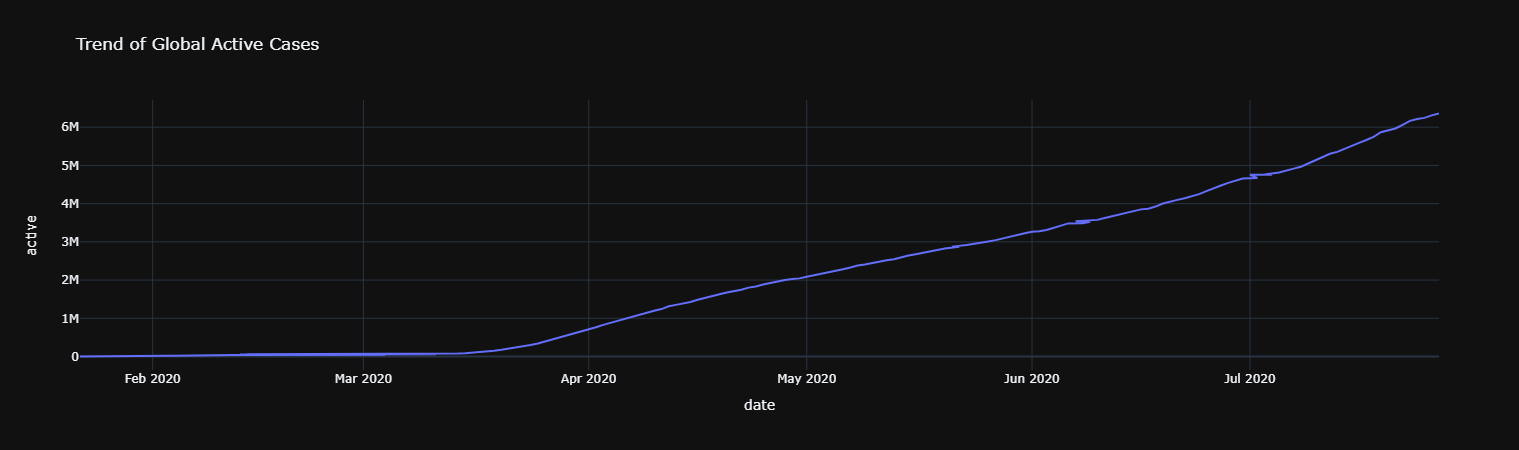

In [35]:
df_gl = top_active(df, 'date', df['date'].nunique())

fig = px.line(df_gl, x='date', y='active',
              title= 'Trend of Global Active Cases',
            height=450
             )
fig.show()

The active cases is still on the rise. It will do a lot of benefit to find double up on finding the cure. And to enforce the anti-spreading measures

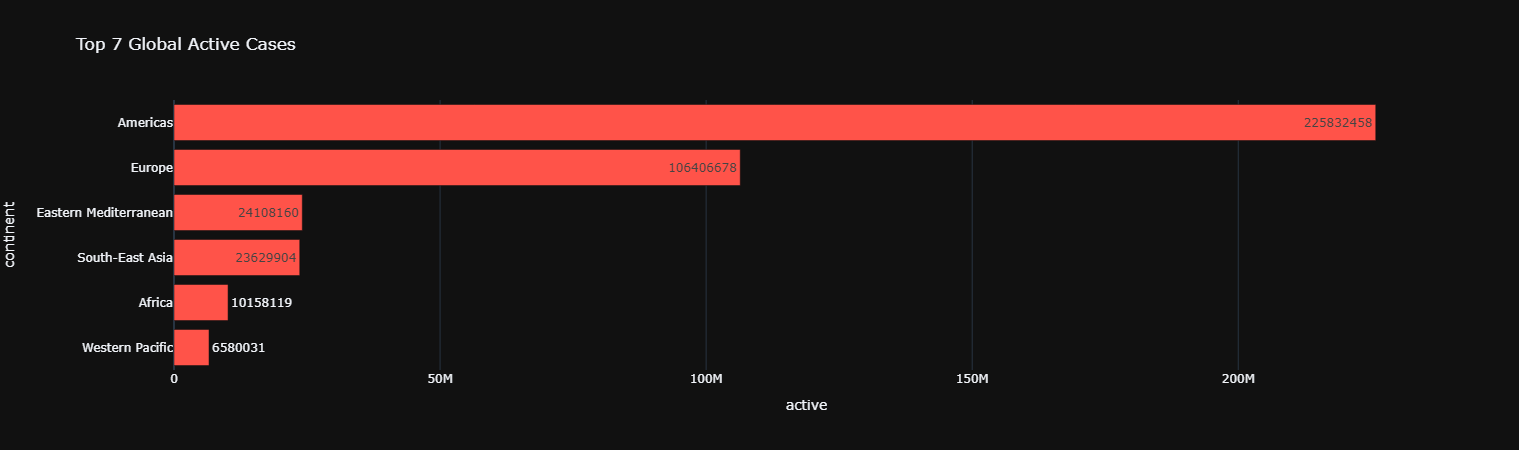

In [36]:
df_active_cont = top_active(df, 'continent', 7)

fig = px.bar(df_active_cont, x='active', y='continent',text='active',
             color_discrete_sequence=['#ff5349'], 
            orientation='h', title='Top 7 Global Active Cases', height = 450)
fig.show()

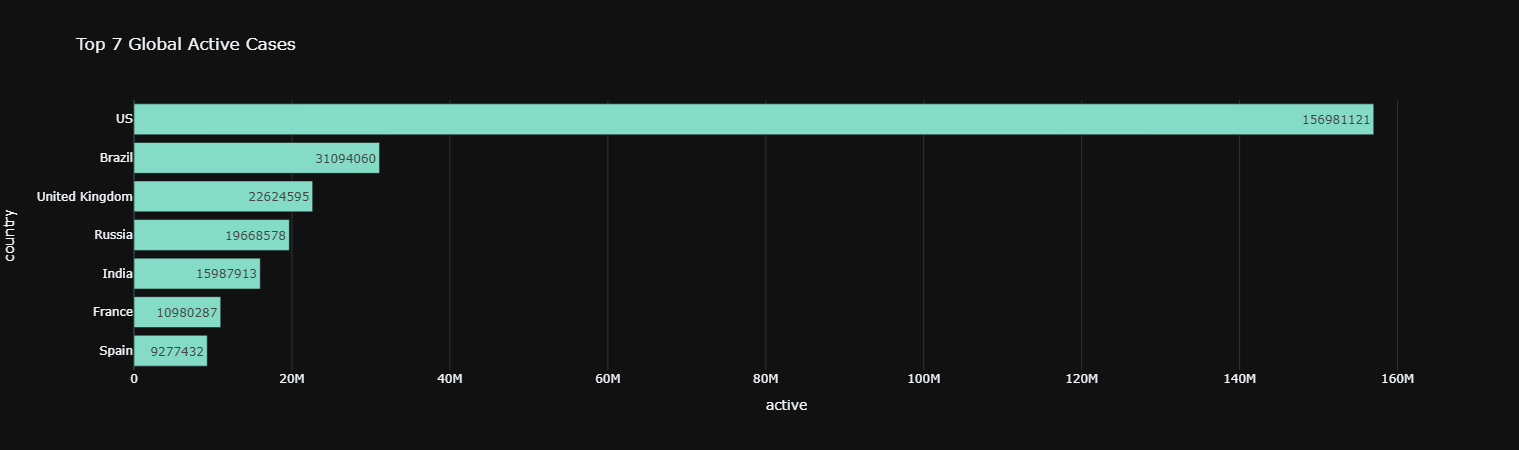

In [37]:
ddf = top_active(data=df,filterr='country', num=7)

fig = px.bar(ddf, x='active', y='country',text='active',
             color_discrete_sequence=['#84DCC6'], 
            orientation='h', title='Top 7 Global Active Cases', height = 450)
fig.show()

In [38]:
all_cont = ['Eastern Mediterranean', 'Europe', 'Africa', 'Americas','Western Pacific', 'South-East Asia']

def top_activ(data,num:int, continent:str):
    '''takes in dataframe & continent name and give top 7 active case'''
    df_conte = data[data['continent'] == continent]
    df_conte = df_conte.groupby('country')[['active']].sum().reset_index()
    df_conte = df_conte.sort_values(by='active', ascending=False)[:num][::-1]
    return df_conte

*****cases in Eastern Mediterranean *****


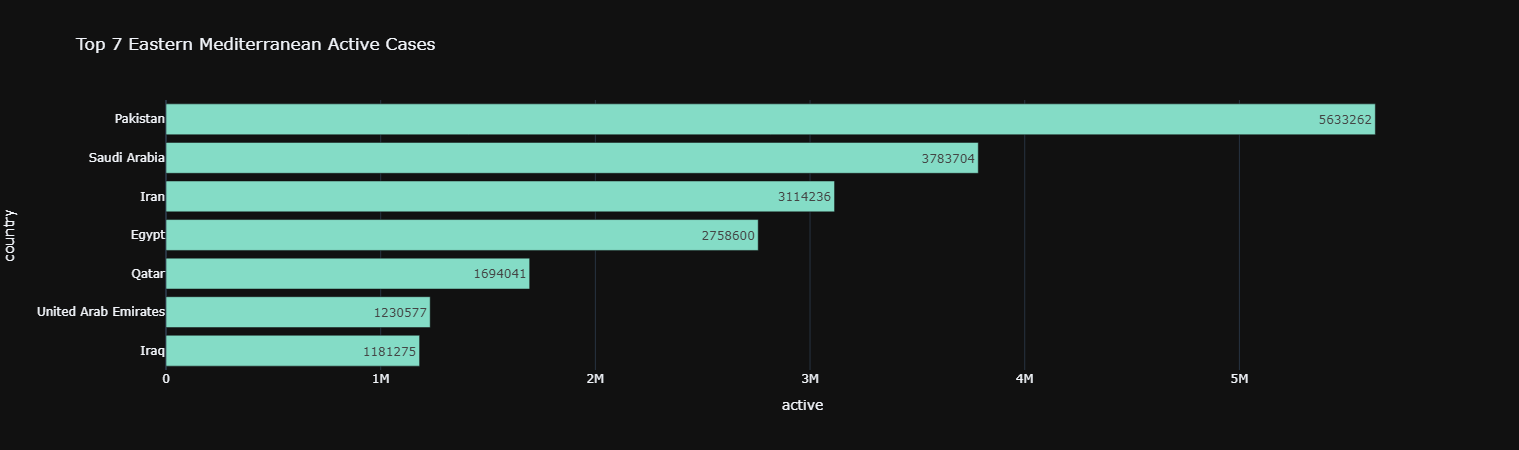

*****cases in Europe *****


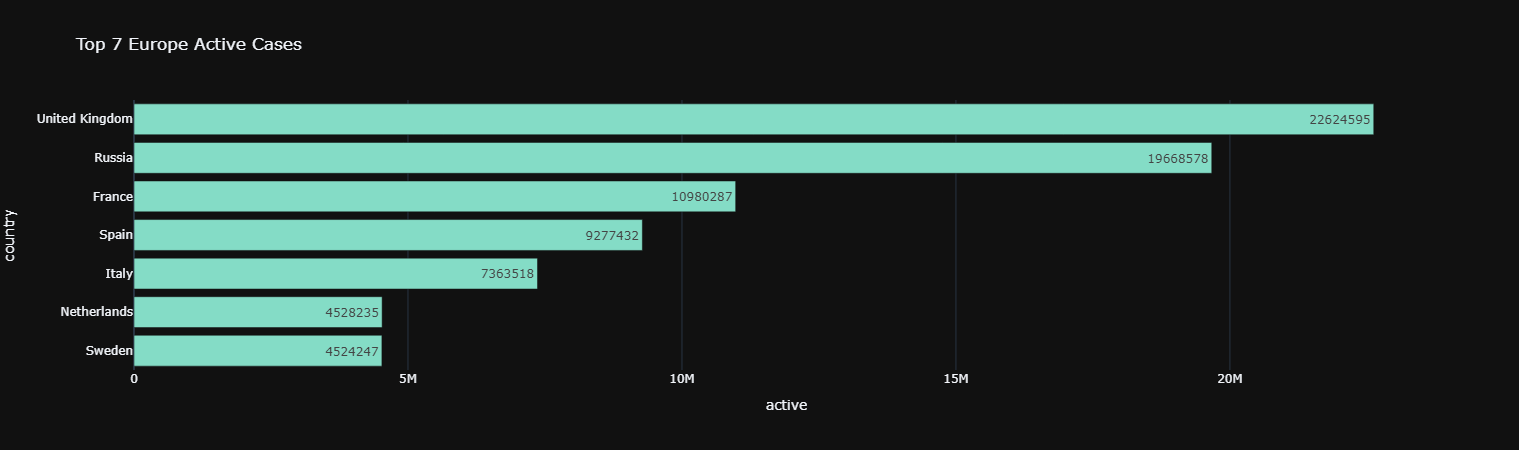

*****cases in Africa *****


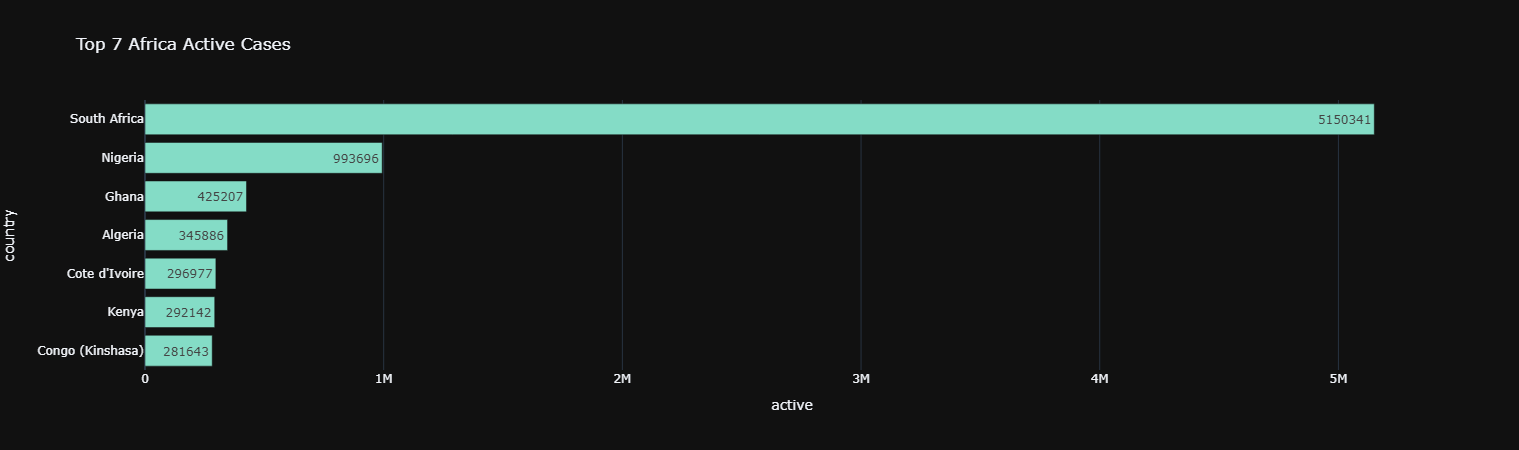

*****cases in Americas *****


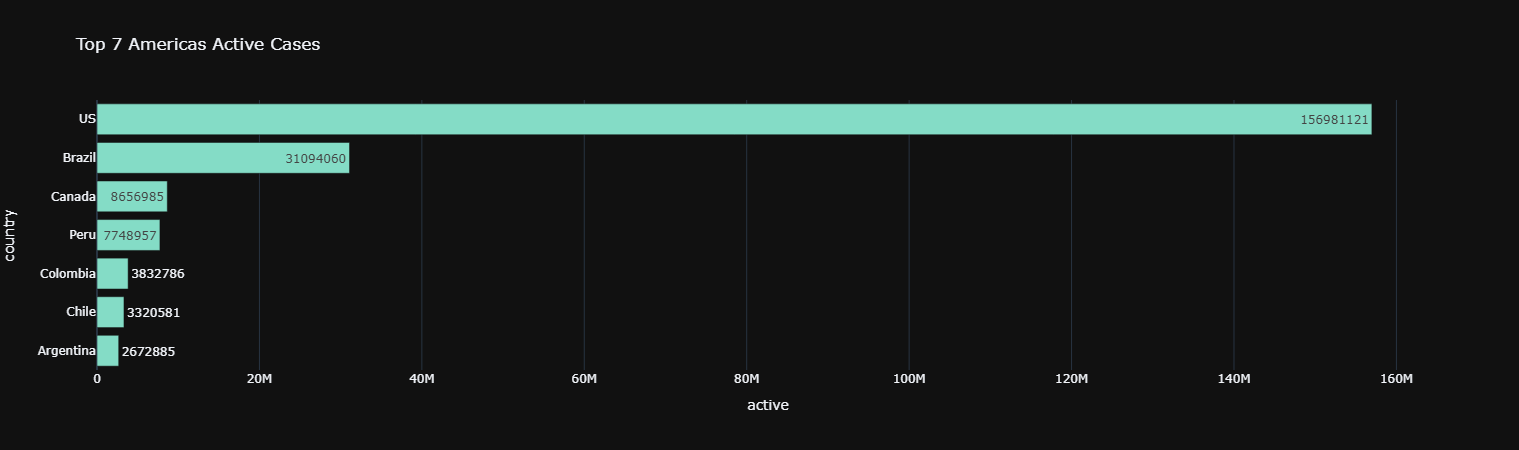

*****cases in Western Pacific *****


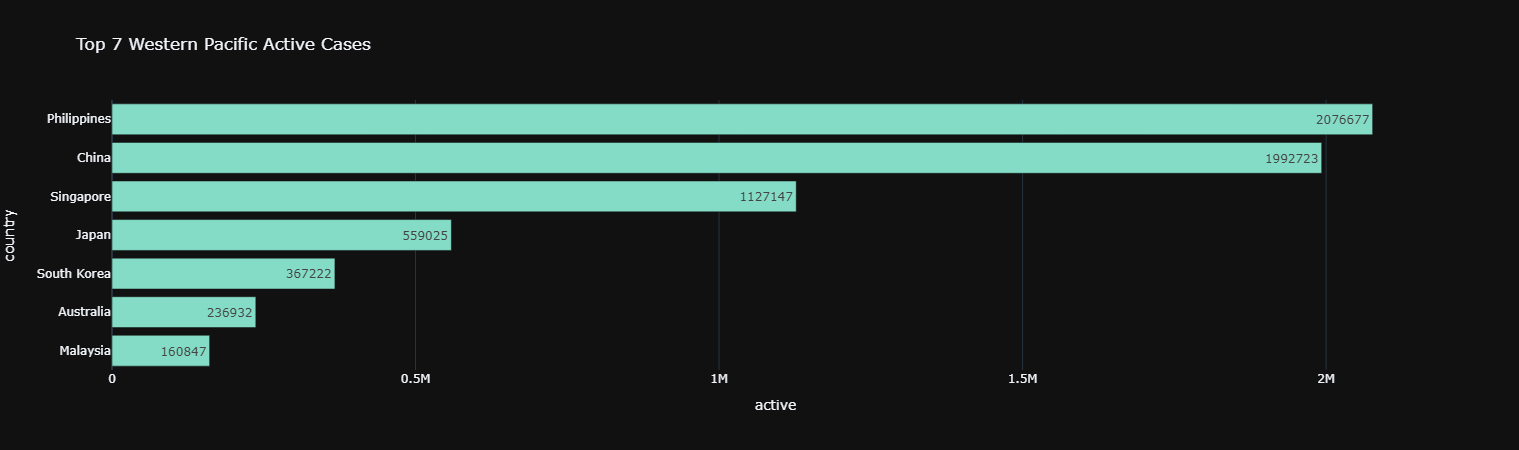

*****cases in South-East Asia *****


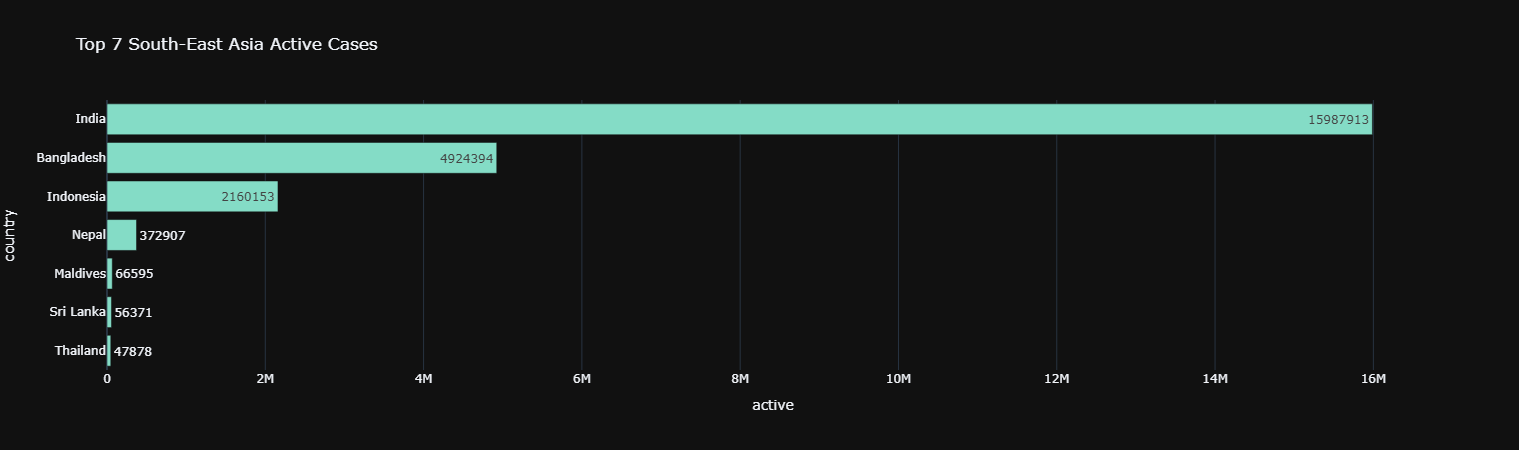

In [39]:
for cnt in all_cont:
    print(f'*****cases in {cnt} *****')
    df_con = top_activ(df, 7, cnt)
    
    fig = px.bar(df_con, x='active', y='country',text='active',
            color_discrete_sequence=['#84DCC6'], 
            orientation='h', title=f'Top 7 {cnt} Active Cases', height = 450)
    fig.show()     

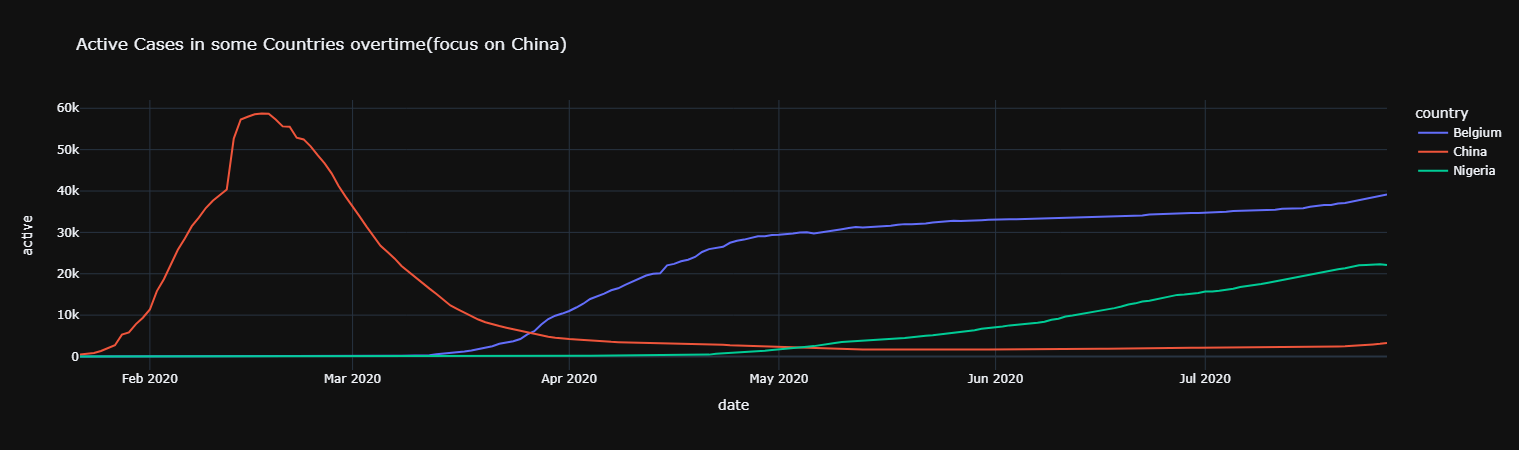

In [40]:
countries = ['China', 'Belgium', 'Nigeria']

df_chinn = df[df['country'].isin(countries)]
df_chinn = df_chinn.groupby(['date', 'country'])[['active']].sum().reset_index()

fig = px.line(
            df_chinn, x='date', y='active', 
            color='country',title= 'Active Cases in some Countries overtime(focus on China)' ,
            height=450)

fig.show()

China has been able to cub the effectiveness of the virus since February and the rest of the world can learn a thing or two from the measures taken by China. Even China has lesser active cases than a country like Nigeria where the virus has been bit been comparatively potent.

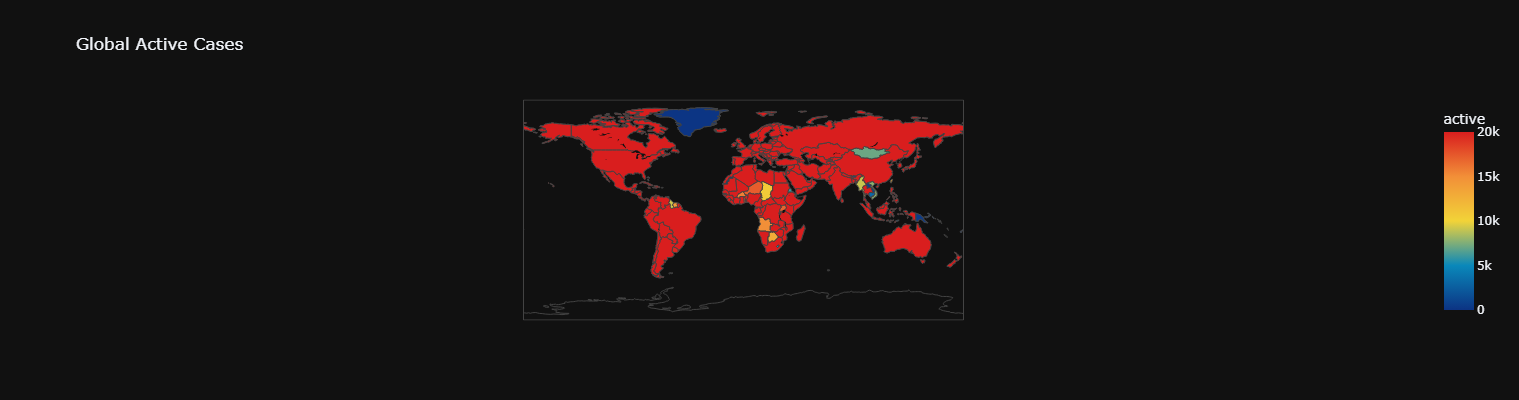

In [41]:
#map showing global active cases
global_active = df.groupby('country')[['active']].sum().reset_index()

fig = px.choropleth(
            global_active, locations='country', locationmode='country names',color='active',
            hover_name='country', range_color=[1, 20000], color_continuous_scale='portland',
            title='Global Active Cases', height=400
            )

fig.show()

Despite in fall of active cases in china overtime,  there is still a significant number

## Recovery

Which countries exhibit strong immunity against this virus?

In [42]:
def recovery(data, cat_col:str, num_col1, num_col2):
    """groups dataframe according to their categories"""
    df_recov = data.groupby(cat_col)[[num_col1, num_col2]].sum().reset_index()
    return df_recov
                                    

In [43]:
def subfilter(data, cat_col, value):
    """filter data by specified condition"""
    df_subrec = data[data[cat_col] == value]
    return df_subrec

There has been a sudden fall in recovery rate March and Since April, the measures that were put in place to counter this fall has been effective. The recovery rate has been on a steady increase since then

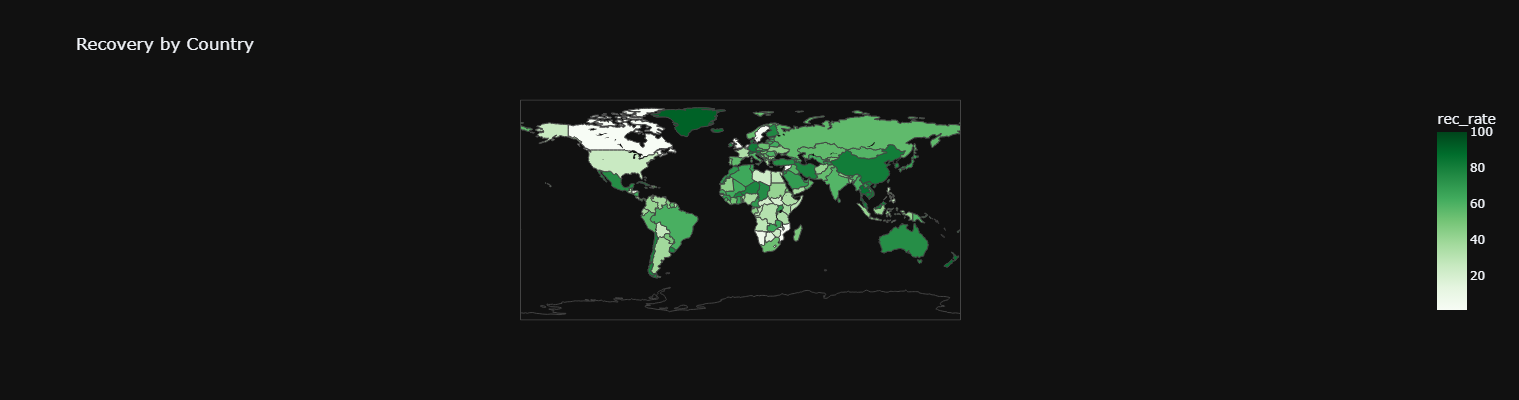

In [48]:
global_rec = recovery(df, 'country','confirmed' ,'recovered')
global_rec['rec_rate'] = round((global_rec['recovered']/global_rec['confirmed'])*100, 2)

fig = px.choropleth(global_rec, locations='country', locationmode='country names',
                color='rec_rate',hover_name='country',hover_data=['recovered', 'rec_rate'], range_color=[1, 100], 
                color_continuous_scale='greens',title='Recovery by Country', height=400)
fig.show()

#mortality rate

China and green has shown the highest recovery rate while US despite having one of the highest confimred cases exhibit just approx 25 % recovery rate. This is not a good news for the north America country 

In [71]:
top_g = global_rec.sort_values(by='rec_rate', ascending=False).head(7)[::-1]
tail_g = global_rec.sort_values(by='rec_rate', ascending=False)
tail_g = tail_g[tail_g['rec_rate'] != 0].tail()[::-1]

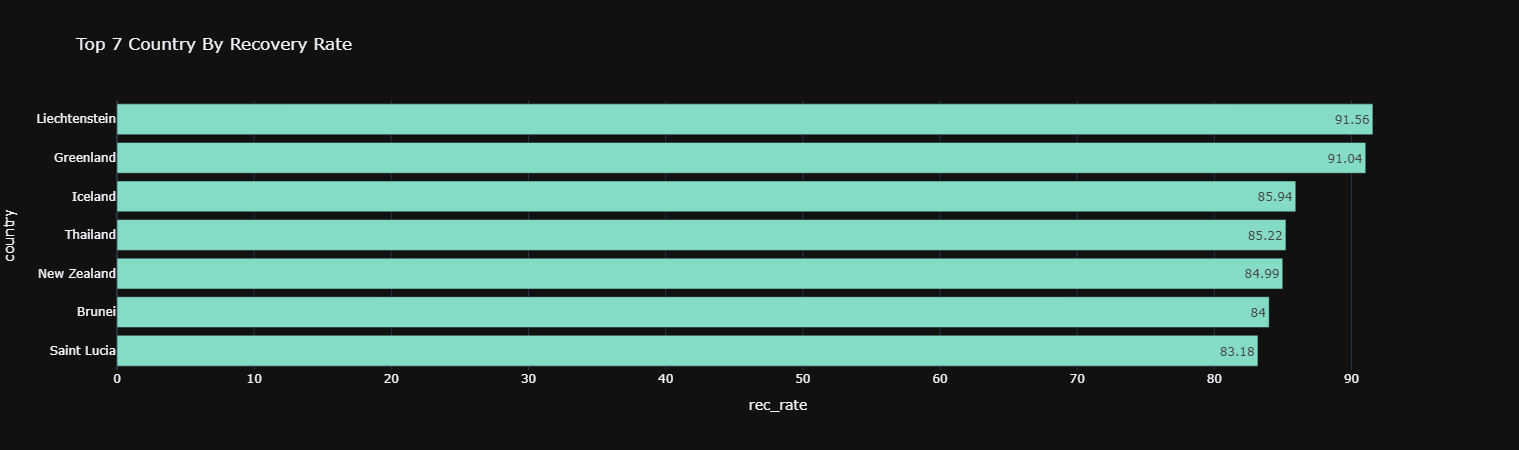

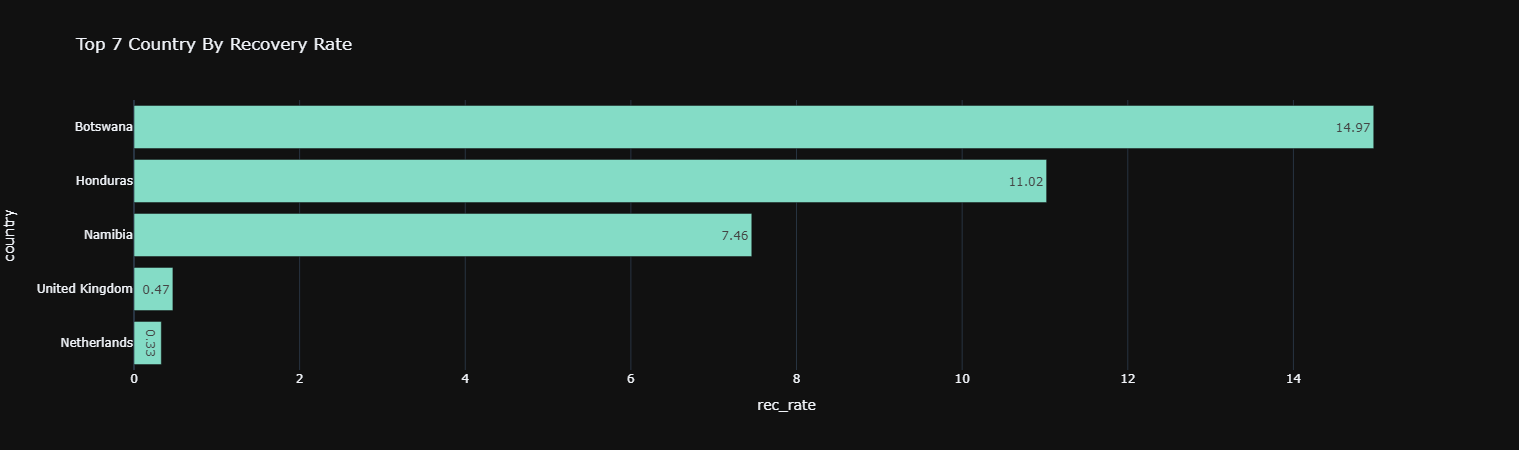

In [73]:
fig = px.bar(top_g, x='rec_rate', y='country',text='rec_rate',
            color_discrete_sequence=['#84DCC6'], 
            orientation='h', title=f'Top 7 Country By Recovery Rate', height = 450
            )
fig.show() 

fig = px.bar(tail_g, x='rec_rate', y='country',text='rec_rate',
            color_discrete_sequence=['#84DCC6'], 
            orientation='h', title=f'Top 7 Country By Recovery Rate', height = 450
            )
fig.show() 